In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [3]:
#Carregando dataset
dataset = load_digits()

X = dataset.data
y = dataset.target

In [4]:
X.shape

(1797, 64)

In [469]:
def weights_initialization(X,m,n):
    X: np.array
    return np.random.normal(size=(m,n,X.shape[1]))

def euclidean_distance(x1,x2):
    x1: np.array
    x2: np.array
    try:
        return np.sqrt(np.sum(np.square(x1-x2),axis=1))
    except:
        return np.sqrt(np.sum(np.square(x1-x2)))
def winner(X,w,m,n):
    #Função que calcula o neurônio vencedor
    try:
        dist = np.zeros(shape=(m,n))
        for i in range(m):
            for j in range(n):
                dist[i,j] = euclidean_distance(X,w[i,j])
        return np.unravel_index(np.argmin(dist, axis=None), dist.shape)
    except: 
        dist = np.zeros(shape=(X.shape[0],m,n))
        for i in range(m):
            for j in range(n):
                dist[:,i,j] = euclidean_distance(X,w[i,j])
        return [np.unravel_index(np.argmin(dist[i], axis=None), dist.shape)[1:] for i in range(X.shape[0])]
    
def alpha_operator(w_winner,w_loser,sigma):
    return np.exp(-(euclidean_distance(w_winner,w_loser))/2*(sigma**2))

def SOM(X,m,n,epochs,lr,sigma):
    X: np.asarray #Dataset
    m: int #número de linhas da grade
    n: int #numero de colunas da grade
    epochs: int #número de épocas
    lr: float #taxa de aprendizado
    sigma: float #operador de vizinhança
    
    w = weights_initialization(X,m,n)
    
    for n_int in range(epochs):
        w_winner = winner(X,w,m,n)
        for n_x in range(X.shape[0]):
            idx_loser = np.ones(shape=(m,n),dtype=bool)
            idx_loser[w_winner[0][0],w_winner[0][1]] = False
            alpha = alpha_operator(w[w_winner[n_x]],w[idx_loser],0.5)
            #Atualizando o neurônio vencedor
            w[w_winner[n_x]] = w[w_winner[0]] + lr*(X[n_x].T-w[w_winner[0]])
            #Atualizando os outros neurônios
            w[idx_loser] = w[idx_loser] + alpha.reshape((-1,1))*lr*(X[n_x]-w[idx_loser])
    return w

In [470]:
m=5
n=5
weights = SOM(X,m,n,epochs=5000,lr=0.5,sigma=0.3)

In [471]:
w_neuron = winner(X,weights,m,n)

In [472]:
winner(x,weights,m,n)

(0, 2)

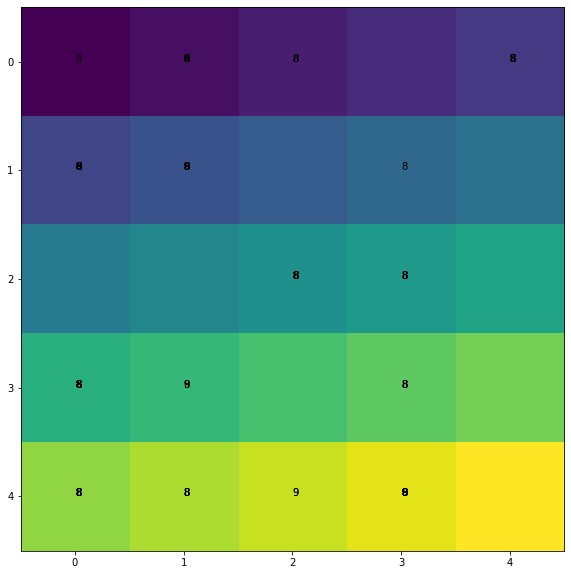

In [481]:
plt.figure(figsize=(10,10))
plt.imshow(np.arange(0,25).reshape(5,5))

for i in range(8,10):
    for x,y_t in zip(X[y==i],y[y==i]):
        plt.text(winner(x,weights,m,n)[0],winner(x,weights,m,n)[1],s=str(y_t))